In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import gcsfs
from scipy import signal

In [2]:
# Experiments to process
experiment_ids = ['historical', 'ssp370']

# Seasons to process
seasons = ['all','DJF','JJA']

# Time slices (future) to process
time_slices = ([['1991','2020'],
                ['2001','2030'],
                ['2011','2040'],
                ['2021','2050'],
                ['2031','2060'],
                ['2041','2070'],
                ['2051','2080'],
                ['2061','2090'],
                ['2071','2100']])

In [3]:
tresults_new=pd.read_csv('tresults.csv',index_col=0)
tresults_new

,BCC-CSM2-MR,BCC-ESM1,CAMS-CSM1-0,CESM2,CESM2-WACCM,CanESM5,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0
time,,,,,,,,,,
1991,0.263131,0.393605,0.148219,0.309265,0.338959,0.394012,0.248474,0.291992,0.162506,0.314636
2001,0.681881,0.829525,0.428157,0.791779,0.779694,1.012848,0.610657,0.695160,0.479370,0.763702
2011,0.964405,1.080178,0.585576,1.094421,1.007812,1.438416,0.812866,1.021454,0.697571,1.023926
2021,1.241889,1.282091,0.772981,1.337646,1.271332,1.863525,1.021637,1.346252,0.924072,1.267822
2031,1.599642,NaN,0.993941,1.657044,1.642242,2.394562,1.295197,1.789947,1.235840,1.614258
2041,1.969406,NaN,1.272330,2.027405,2.098663,2.996094,1.631073,2.248840,1.533264,1.980377
2051,2.325532,NaN,1.531311,2.485107,2.548523,3.578979,2.001831,2.722992,1.861328,2.343811
2061,2.711011,NaN,1.834118,3.025238,3.027191,4.184479,2.398163,3.222717,2.143311,2.689728
2071,3.085562,NaN,2.101575,3.541107,3.494812,4.786499,2.761658,3.826843,2.475281,3.042175


In [4]:
tresults_dict=tresults_new.to_dict()

In [5]:
dt=np.zeros((len(time_slices),len(tresults_dict)))*np.nan 

In [6]:
modelcount=0
modelnames=[]
for model in tresults_dict:
    modelnames.append(model)
    timecount=0
    for timeperiod in tresults_dict[model]:
        dt[timecount,modelcount]=tresults_dict[model][timeperiod]
        timecount=timecount+1
    modelcount=modelcount+1

In [7]:
dt

array([[0.26313055, 0.39360542, 0.14821949, 0.30926514, 0.33895874,
        0.39401245, 0.24847412, 0.2919922 , 0.1625061 , 0.31463623],
       [0.68188075, 0.82952515, 0.42815707, 0.79177856, 0.7796936 ,
        1.0128479 , 0.61065674, 0.6951599 , 0.47937012, 0.7637024 ],
       [0.96440457, 1.08017823, 0.58557582, 1.0944214 , 1.0078125 ,
        1.4384155 , 0.8128662 , 1.0214539 , 0.6975708 , 1.0239258 ],
       [1.24188902, 1.28209087, 0.77298114, 1.3376465 , 1.2713318 ,
        1.8635254 , 1.021637  , 1.3462524 , 0.92407227, 1.2678223 ],
       [1.59964152,        nan, 0.99394116, 1.6570435 , 1.6422424 ,
        2.3945618 , 1.2951965 , 1.7899475 , 1.2358398 , 1.6142578 ],
       [1.96940613,        nan, 1.27233027, 2.0274048 , 2.0986633 ,
        2.9960938 , 1.631073  , 2.2488403 , 1.5332642 , 1.9803772 ],
       [2.32553204,        nan, 1.53131095, 2.4851074 , 2.548523  ,
        3.5789795 , 2.001831  , 2.722992  , 1.8613281 , 2.343811  ],
       [2.71101125,        nan, 1.8341175

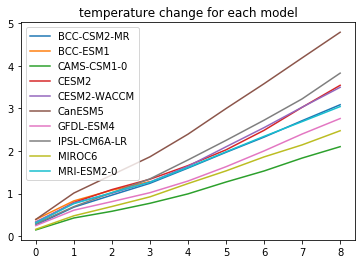

In [8]:
plt.plot(dt)
plt.title('temperature change for each model')
plt.legend(modelnames)

In [9]:
plt.savefig('../figures/temperature.png')

<Figure size 432x288 with 0 Axes>

In [10]:
dsdG_djf_new=pd.read_csv('dsdG_djf.csv',index_col=0)
dsdG_djf_new

,BCC-CSM2-MR,BCC-ESM1,CAMS-CSM1-0,CESM2,CESM2-WACCM,CanESM5,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0
time,,,,,,,,,,
1991,0.989044,0.984248,0.958580,1.026722,0.978737,0.997466,0.985704,0.979859,1.031024,0.912875
2001,0.987285,0.971767,0.965127,0.976349,0.999845,1.063397,1.042622,1.037260,1.078220,0.895387
2011,1.030095,1.011795,1.030690,1.061829,1.055055,1.091641,1.053675,1.071447,1.011839,0.827941
2021,1.057827,1.024297,1.047871,1.097285,1.082965,1.142738,1.055215,1.041257,0.982974,0.874168
2031,1.083498,NaN,1.103655,1.151470,1.159114,1.188321,1.094028,1.084417,0.944970,0.920385
2041,1.067378,NaN,1.084269,1.148665,1.150915,1.199033,1.186544,1.097213,1.014023,1.073289
2051,1.063073,NaN,1.091176,1.155021,1.183169,1.168573,1.221739,1.165277,1.042218,1.202263
2061,1.067791,NaN,1.050259,1.141601,1.140248,1.205437,1.171424,1.184316,1.067995,1.180638
2071,1.089077,NaN,1.075644,1.135518,1.180813,1.230395,1.151937,1.235009,1.081192,1.169525


In [11]:
dsdG_djf=dsdG_djf_new.to_dict()

In [12]:
dsdG_djf_np=np.zeros((len(time_slices),len(dsdG_djf)))*np.nan 

In [13]:
modelcount=0
for model in tresults_dict:
    timecount=0
    for timeperiod in dsdG_djf[model]:
        dsdG_djf_np[timecount,modelcount]=dsdG_djf[model][timeperiod]
        timecount=timecount+1
    modelcount=modelcount+1

In [14]:
dsdG_djf_np

array([[0.98904353, 0.98424771, 0.95857953, 1.0267216 , 0.97873682,
        0.99746567, 0.98570365, 0.9798587 , 1.0310235 , 0.91287482],
       [0.98728506, 0.97176735, 0.96512739, 0.97634876, 0.99984467,
        1.06339717, 1.04262197, 1.03726017, 1.07822025, 0.89538723],
       [1.03009469, 1.011795  , 1.03068996, 1.06182861, 1.0550549 ,
        1.09164131, 1.0536747 , 1.07144666, 1.01183891, 0.8279407 ],
       [1.05782653, 1.02429655, 1.04787076, 1.09728527, 1.08296537,
        1.14273763, 1.05521512, 1.04125726, 0.98297387, 0.87416816],
       [1.08349843,        nan, 1.10365547, 1.15146983, 1.15911388,
        1.18832123, 1.09402812, 1.0844171 , 0.94496953, 0.92038459],
       [1.06737831,        nan, 1.08426939, 1.14866543, 1.15091503,
        1.19903302, 1.18654358, 1.09721315, 1.01402295, 1.07328916],
       [1.06307282,        nan, 1.09117584, 1.15502107, 1.18316948,
        1.16857266, 1.22173917, 1.16527689, 1.04221821, 1.20226276],
       [1.06779106,        nan, 1.0502594

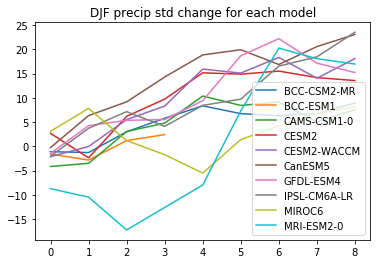

In [15]:
plt.plot((dsdG_djf_np-1)*100)
plt.title('DJF precip std change for each model')
plt.legend(modelnames)

In [16]:
plt.savefig('../figures/precip.png')

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Precip change (%)')

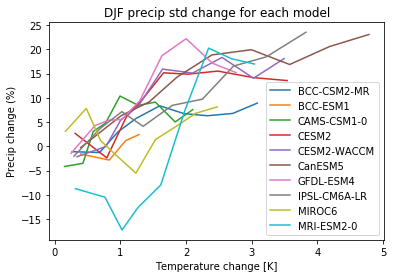

In [17]:
plt.plot(dt,(dsdG_djf_np-1)*100)
plt.title('DJF precip std change for each model')
plt.legend(modelnames)
plt.xlabel('Temperature change [K]')
plt.ylabel('Precip change (%)')


### make sure that any nan is matched everywhere

In [18]:
# make dt nan wherever any other field has a nan
dt[np.where(np.isnan(dsdG_djf_np))]=np.nan
#dt[np.where(np.isnan(dsdG_jja_etc_np))]=np.nan

In [19]:
# than, make all fields nan where dt is nan. this should cover it. 
dsdG_djf_np[np.where(np.isnan(dt))]=np.nan
#dsdG_jja_etc_np[np.where(np.isnan(dt))]=np.nan

In [20]:
for i in range(10):
    print(modelnames[i])
    print(dt[:,i])
    print(dsdG_djf_np[:,i])
    print

BCC-CSM2-MR
[0.26313055 0.68188075 0.96440457 1.24188902 1.59964152 1.96940613
 2.32553204 2.71101125 3.08556166]
[0.98904353 0.98728506 1.03009469 1.05782653 1.08349843 1.06737831
 1.06307282 1.06779106 1.08907736]
BCC-ESM1
[0.39360542 0.82952515 1.08017823 1.28209087        nan        nan
        nan        nan        nan]
[0.98424771 0.97176735 1.011795   1.02429655        nan        nan
        nan        nan        nan]
CAMS-CSM1-0
[0.14821949 0.42815707 0.58557582 0.77298114 0.99394116 1.27233027
 1.53131095 1.83411751 2.10157457]
[0.95857953 0.96512739 1.03068996 1.04787076 1.10365547 1.08426939
 1.09117584 1.05025947 1.0756442 ]
CESM2
[0.30926514 0.79177856 1.0944214  1.3376465  1.6570435  2.0274048
 2.4851074  3.025238   3.5411072 ]
[1.0267216  0.97634876 1.06182861 1.09728527 1.15146983 1.14866543
 1.15502107 1.14160109 1.13551831]
CESM2-WACCM
[0.33895874 0.7796936  1.0078125  1.2713318  1.6422424  2.0986633
 2.548523   3.0271912  3.494812  ]
[0.97873682 0.99984467 1.0550549 

In [21]:
np.nanmean(dt,axis=1)

array([0.28648004, 0.70727722, 0.97266247, 1.23292487, 1.58029689,
       1.97305033, 2.37771278, 2.80399502, 3.23505684])

In [22]:
np.nanmean((dsdG_djf_np-1)*100,axis=1)

array([-1.55744487,  0.17260027,  2.46005441,  4.06596527,  8.10953539,
       11.34811128, 14.36121009, 13.44122167, 14.99012524])

Text(0, 0.5, 'Precip change (%)')

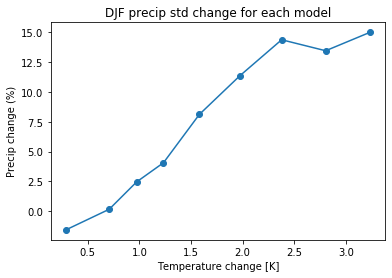

In [23]:
plt.plot(np.nanmean(dt,axis=1),np.nanmean((dsdG_djf_np-1)*100,axis=1),marker='o')
plt.title('DJF precip std change for each model')
plt.xlabel('Temperature change [K]')
plt.ylabel('Precip change (%)')

In [24]:
plt.savefig('../figures/variabilitychange.png')

<Figure size 432x288 with 0 Axes>